In [2]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

In [3]:
biopsy = pd.read_csv('../oefeningen/DataSets/biopsy.csv', sep=";")
def LDA_coefficients(X,lda):
    nb_col = X.shape[1]
    matrix= np.zeros((nb_col+1,nb_col), dtype=int)
    Z=pd.DataFrame(data=matrix,columns=X.columns)
    for j in range(0,nb_col):
        Z.iloc[j,j] = 1
    LD = lda.transform(Z)
    nb_funct= LD.shape[1]
    resultaat = pd.DataFrame();
    index = ['const']
    for j in range(0,LD.shape[0]-1):
        index = np.append(index,'C'+str(j+1))
    for i in range(0,LD.shape[1]):
        coef = [LD[-1][i]]
        for j in range(0,LD.shape[0]-1):
            coef = np.append(coef,LD[j][i]-LD[-1][i])
        result = pd.Series(coef)
        result.index = index
        column_name = 'LD' + str(i+1)
        resultaat[column_name] = result
    return resultaat

In [59]:
X = biopsy[['V1','V2','V3']]

Y = biopsy[['class']]
lda = LinearDiscriminantAnalysis()
lda.fit(X,Y)
LD = lda.transform(X)
LD_df = pd.DataFrame(zip(LD[:,0], biopsy['class']),
columns=['LD1','Target'])
predicted = pd.Series(lda.predict(X), name='predicted')
actual = biopsy['class'].rename('actual')
pd.crosstab(index=actual, columns=predicted, margins='all',margins_name='total')


C:\Users\robbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9384835479256081

<Figure size 640x480 with 0 Axes>

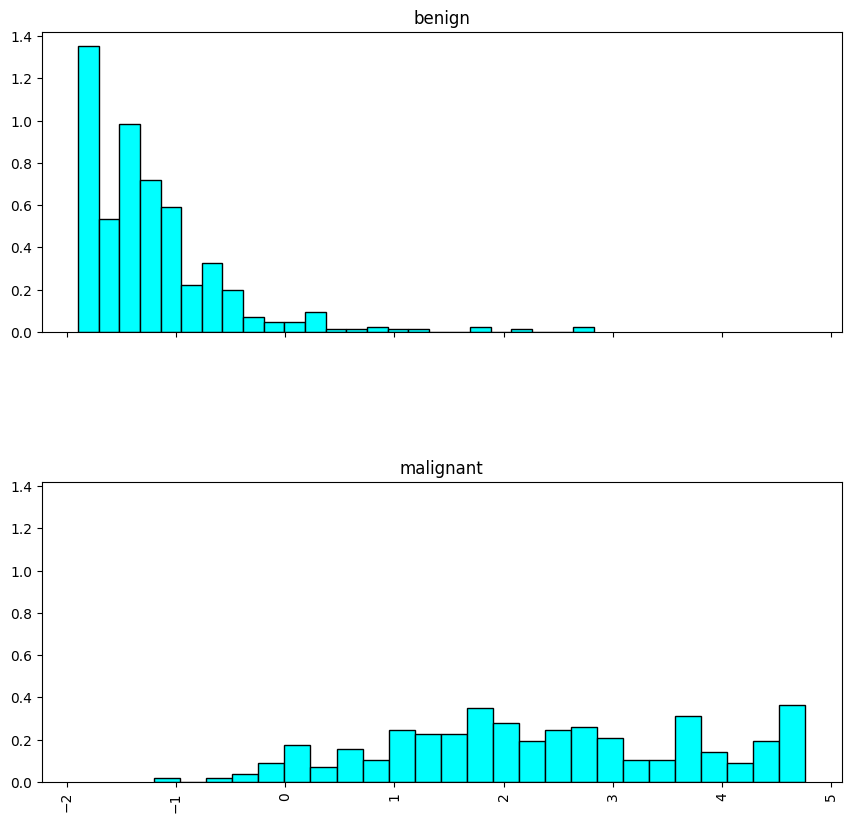

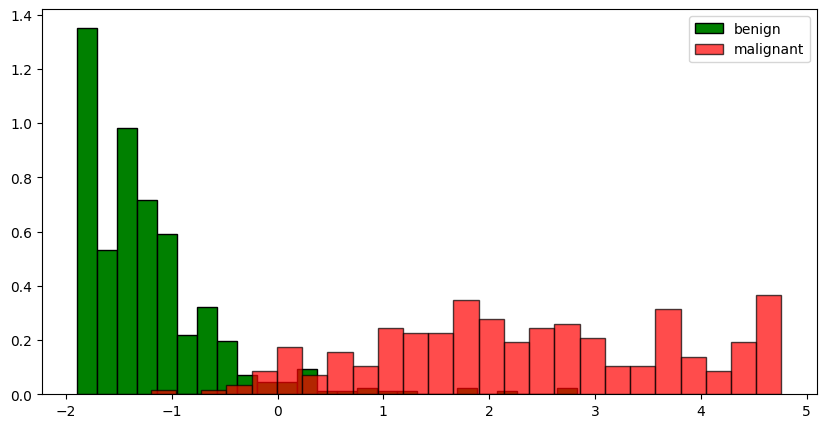

In [18]:
plt.figure()
LD_df.hist(column=['LD1'], by='Target', bins=25, density=True, edgecolor='black' , color='cyan', sharex=True, sharey=True, figsize=(10,10), layout=(2,1))
fig, ax = plt.subplots(figsize=(10,5))
LD_df['LD1'][LD_df['Target'] == 'benign'].hist(ax=ax, bins=25, density = True,edgecolor='black', color='green', label='benign')
LD_df['LD1'][LD_df['Target'] == 'malignant'].hist(ax=ax, bins=25, density = True,
edgecolor='black', color='red', alpha=0.7, label='malignant')
ax.legend()
ax.grid(False)
plt.show()

<Figure size 640x480 with 0 Axes>

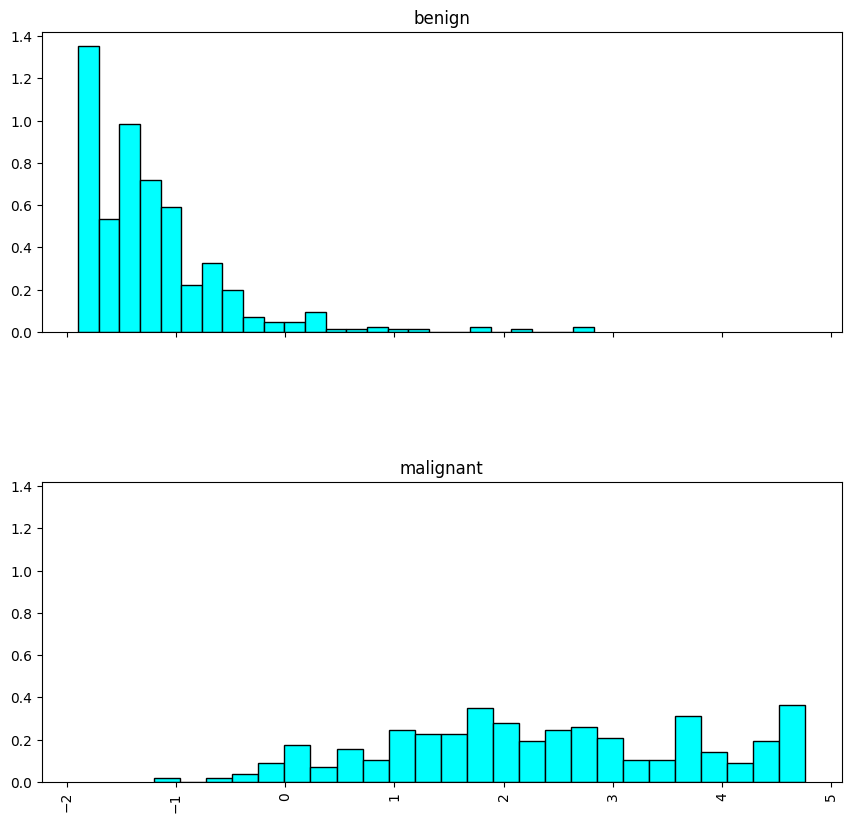

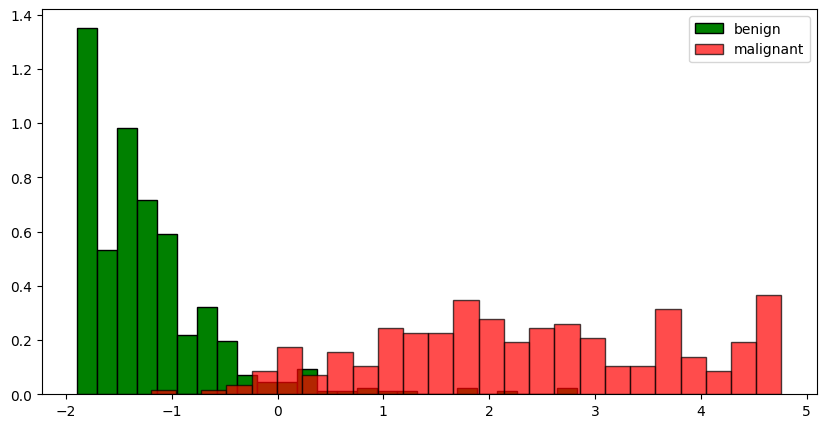

In [30]:
biopsy = pd.read_csv('../oefeningen/DataSets/biopsy.csv', sep=";")
x= biopsy[["V1","V2","V3"]]
y= biopsy["class"]
lda = LinearDiscriminantAnalysis()
lda.fit(x,y)
lda.transform(x)
LDA_coefficients(x,lda)
predicted = pd.Series(lda.predict(X), name='predicted')
actual = biopsy['class'].rename('actual')
pd.crosstab(index=actual, columns=predicted, margins='all',margins_name='total')
LD_df = pd.DataFrame(zip(LD[:,0], biopsy['class']),
columns=['LD1','Target'])
plt.figure()
LD_df.hist(column=['LD1'], by='Target', bins=25, density=True, edgecolor='black' , color='cyan', sharex=True, sharey=True, figsize=(10,10), layout=(2,1))
fig, ax = plt.subplots(figsize=(10,5))
LD_df['LD1'][LD_df['Target'] == 'benign'].hist(ax=ax, bins=25, density = True,edgecolor='black', color='green', label='benign')
LD_df['LD1'][LD_df['Target'] == 'malignant'].hist(ax=ax, bins=25, density = True,
edgecolor='black', color='red', alpha=0.7, label='malignant')
ax.legend()
ax.grid(False)
plt.show()


oef 1
a) pas een discriminatanalyse toe op deze data set waarbij quality als afhankelijke variabele
optreedt en temperature, sun, heat en rain als de onafhankelijke variabelen. check
b) Hoeveel dimensies heeft de discriminantanalyse? 2
c) Maak een plot van de resultaten van de discriminantanalyse. Wat wordt er hier
gevisulaiseerd?
d) Pas het predict commando even toe op de oorspronkelijke gegevens. Hoeveel percent van
de wijnen krijgen dezelfde label opgeplakt via de discriminantanalyse als geobserveerd?


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         34 non-null     int64 
 1   temperature  34 non-null     int64 
 2   sun          34 non-null     int64 
 3   heat         34 non-null     int64 
 4   rain         34 non-null     int64 
 5   quality      34 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.7+ KB


<Figure size 640x480 with 0 Axes>

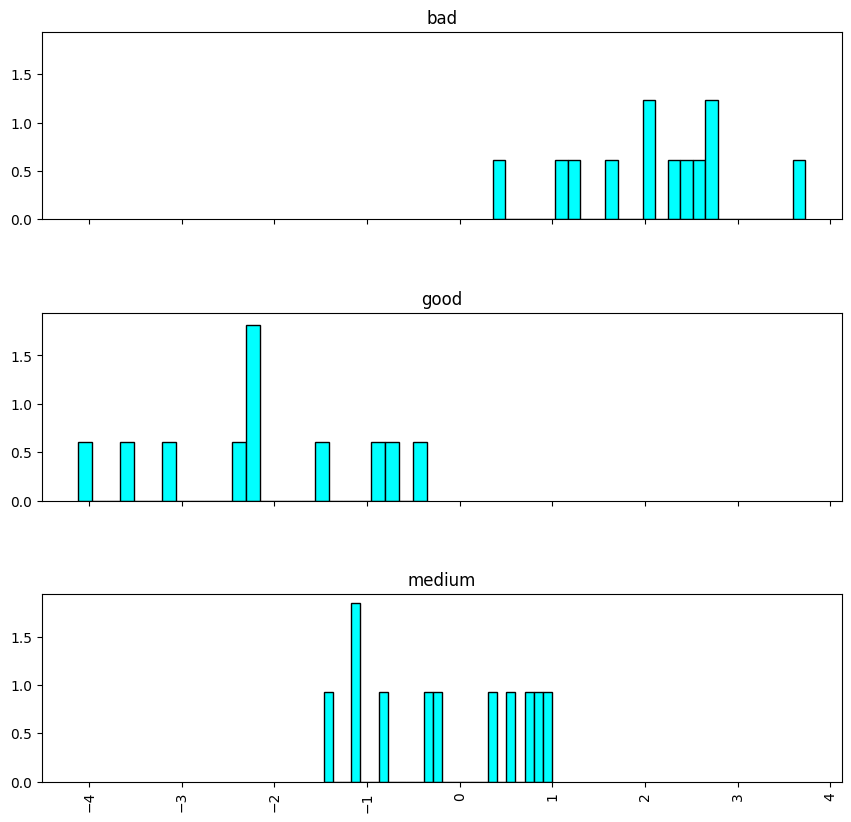

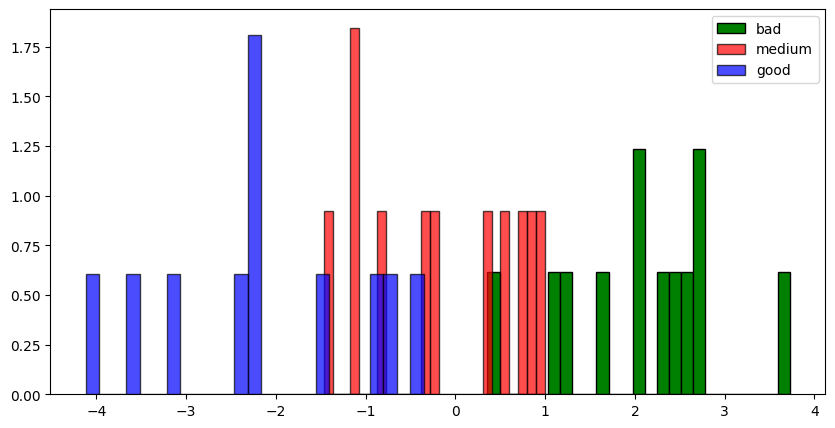

In [50]:
wijn = pd.read_csv('../oefeningen/DataSets/bordeaux.csv',sep=';',decimal=',')
wijn.info()
x=wijn[['heat','rain','sun','temperature']]
y=wijn['quality']
lda = LinearDiscriminantAnalysis()
lda.fit(x,y)
LD = lda.transform(x)
LD_df = pd.DataFrame(zip(LD[:,0], wijn['quality']),
columns=['LD1','quality'])
plt.figure()
LD_df.hist(column=['LD1'], by='quality', bins=25, density=True, edgecolor='black' , color='cyan', sharex=True, sharey=True, figsize=(10,10), layout=(3,1))
fig, ax = plt.subplots(figsize=(10,5))
LD_df['LD1'][LD_df['quality'] == 'bad'].hist(ax=ax, bins=25, density = True,edgecolor='black', color='green', label='bad')
LD_df['LD1'][LD_df['quality'] == 'medium'].hist(ax=ax, bins=25, density = True,edgecolor='black', color='red', alpha=0.7, label='medium')
LD_df['LD1'][LD_df['quality'] == 'good'].hist(ax=ax, bins=25, density = True,edgecolor='black', color='blue', alpha=0.7, label='good')
ax.legend()
ax.grid(False)
plt.show()

In [8]:
pd.DataFrame({"predicted":lda.predict(x),"real":wijn['quality']})

,predicted,real
0,medium,medium
1,bad,bad
2,bad,medium
3,bad,bad
4,good,good
5,good,good
6,bad,bad
7,bad,bad
8,bad,bad
9,good,medium


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         34 non-null     int64 
 1   temperature  34 non-null     int64 
 2   sun          34 non-null     int64 
 3   heat         34 non-null     int64 
 4   rain         34 non-null     int64 
 5   quality      34 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.7+ KB


<Figure size 640x480 with 0 Axes>

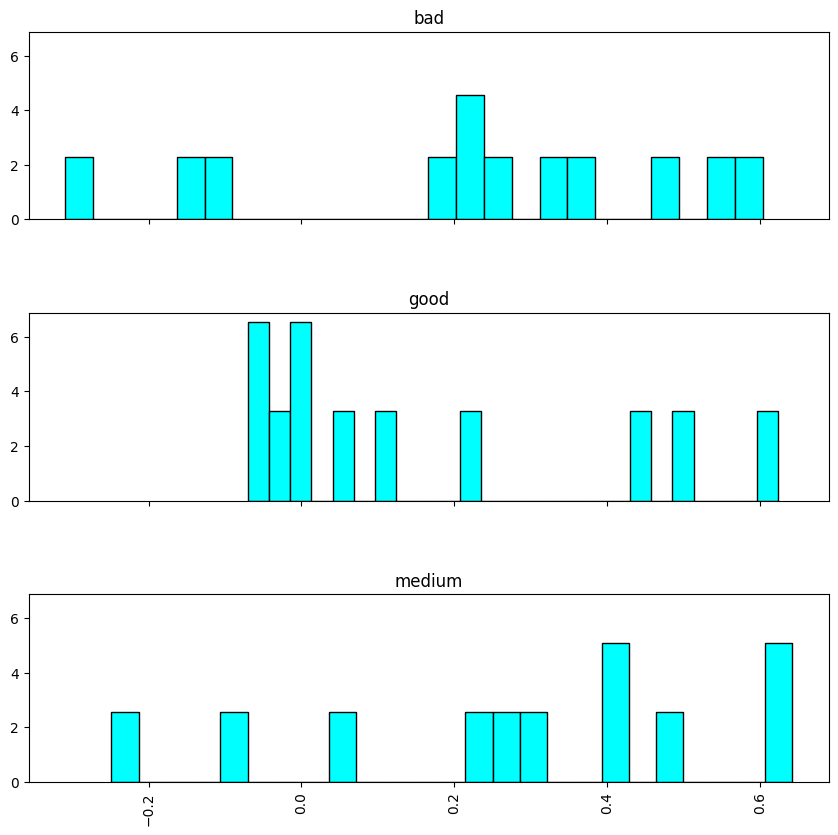

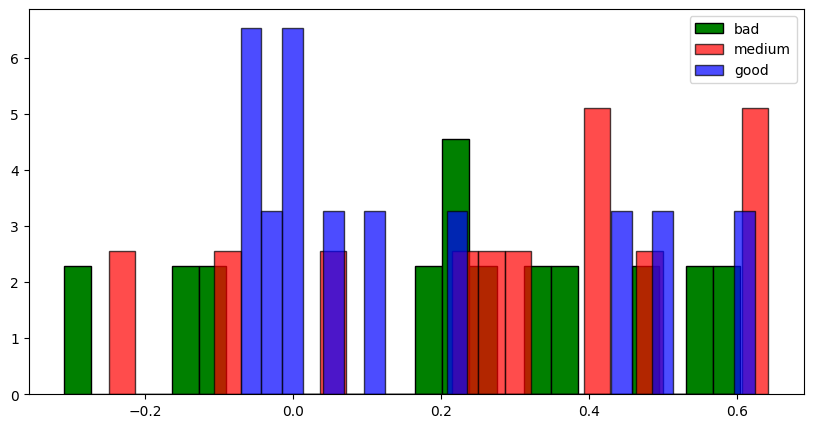

array(['bad', 'good', 'medium'], dtype='<U6')

In [49]:
wijn = pd.read_csv('../oefeningen/DataSets/bordeaux.csv',sep=';',decimal=',')
wijn.info()
x = wijn[["temperature","heat","sun","rain"]]
y = wijn["quality"]
lda=LinearDiscriminantAnalysis()
lda.fit(x,y)
lda.transform(x)
LD_df = pd.DataFrame(zip(LD[:,0], wijn['quality']),
columns=['LD1','quality'])
plt.figure()
LD_df.hist(column=['LD1'], by='quality', bins=25, density=True, edgecolor='black' , color='cyan', sharex=True, sharey=True, figsize=(10,10), layout=(3,1))
fig, ax = plt.subplots(figsize=(10,5))
LD_df['LD1'][LD_df['quality'] == 'bad'].hist(ax=ax, bins=25, density = True,edgecolor='black', color='green', label='bad')
LD_df['LD1'][LD_df['quality'] == 'medium'].hist(ax=ax, bins=25, density = True,edgecolor='black', color='red', alpha=0.7, label='medium')
LD_df['LD1'][LD_df['quality'] == 'good'].hist(ax=ax, bins=25, density = True,edgecolor='black', color='blue', alpha=0.7, label='good')
ax.legend()
ax.grid(False)
plt.show()
pd.DataFrame({"predicted":lda.predict(x),"real":wijn['quality']})
lda.classes_

# 2 
### a) Analyseer de type van gegevens in deze dataset.
### b) Welke kolommen kunnen er als afhankelijke variabele voor een discriminant analyse worden
### gebruikt?
### c) Welke kolommen kunnen er als onafhankelijke variabelen voor een discriminant analyse
### worden gebruikt?
### d) Pas een discriminatanalyse toe op deze data set (maakt gebruik van je keuzes hierboven).
### e) Hoeveel dimensies heeft de discriminantanalyse?
### f) Maak een plot van de resultaten van de discriminantanalyse.


In [44]:
data = pd.read_csv("../oefeningen/DataSets/birthwt.csv" , sep=";")
x= data[['age','lwt','bwt']]
y= data['smoke']
lda= LinearDiscriminantAnalysis()
lda.fit(x,y)
pd.DataFrame({"predicted":lda.predict(x),"real":data['smoke']})

,predicted,real
0,0,0
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
184,0,1
185,0,0
186,0,1
187,0,0


[0 1]


<Figure size 640x480 with 0 Axes>

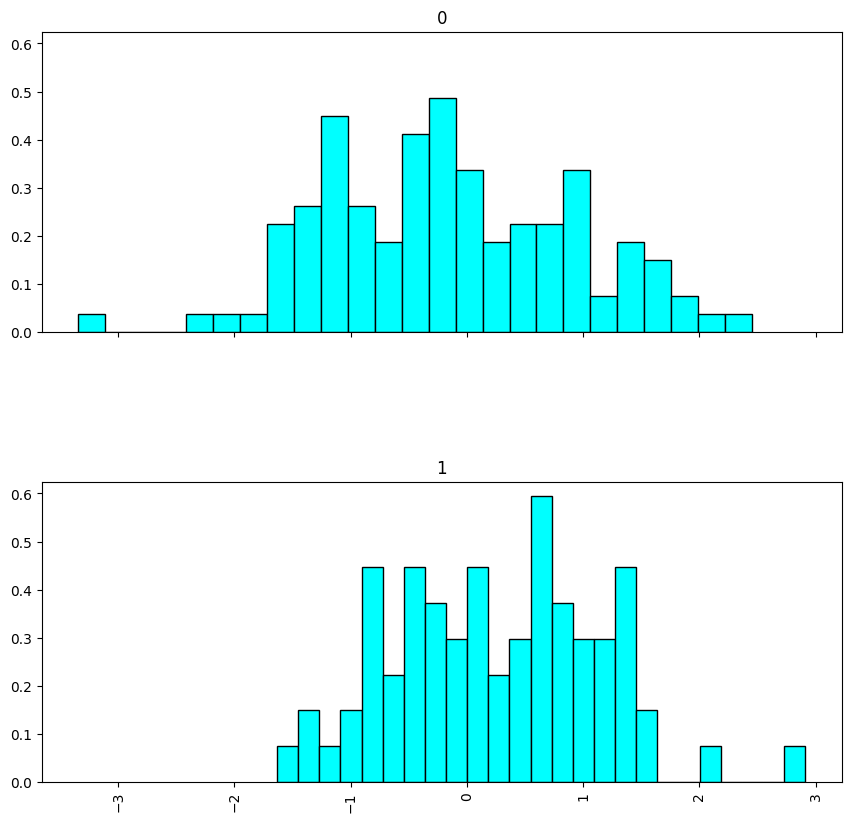

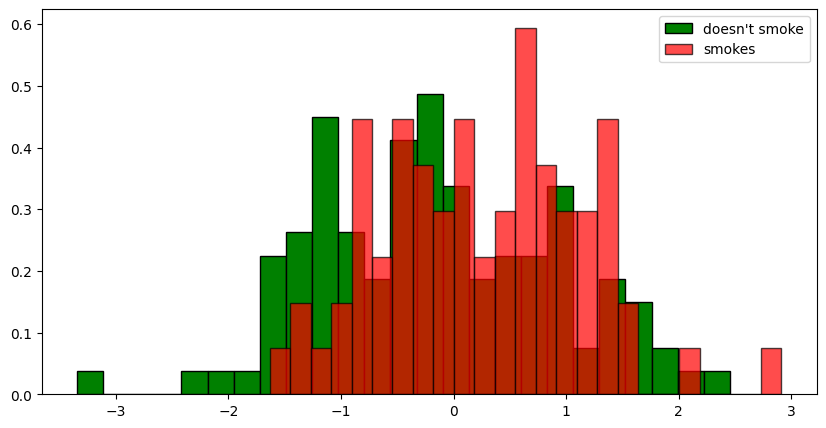

In [48]:
LD = lda.transform(x)
print(lda.classes_)
LD_df = pd.DataFrame(zip(LD[:,0], data["smoke"]),
columns=["LD1","smoke"])
plt.figure()
LD_df.hist(column=['LD1'], by='smoke', bins=25, density=True, edgecolor='black' , color='cyan', sharex=True, sharey=True, figsize=(10,10), layout=(2,1))
fig, ax = plt.subplots(figsize=(10,5))
LD_df['LD1'][LD_df['smoke'] == 0].hist(ax=ax, bins=25, density = True,edgecolor='black', color='green', label="doesn't smoke")
LD_df['LD1'][LD_df['smoke'] == 1].hist(ax=ax, bins=25, density = True,edgecolor='black', color='red', alpha=0.7, label='smokes')
ax.legend()
ax.grid(False)
plt.show()